# Delinquency Telecom Model

Delinquency arises when the activity occurs later than the expected date!

### USE CASE :

_Many donors, experts, and microfinance institutions (MFI) have become convinced that using mobile financial services (MFS) is more convenient and efficient, and less costly, than the traditional high-touch model for delivering microfinance services. MFS becomes especially useful when targeting the unbanked poor living in remote areas. The implementation of MFS, though, has been uneven with both significant challenges and successes._

_Today, microfinance is widely accepted as a poverty-reduction tool, representing 70 billion in outstanding loans and a global outreach of 200 million clients._

_One of our Client in Telecom collaborates with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be delinquent if he deviates from the path of paying back the loaned amount within 5 days._

---

### WHAT I'LL BE DOING IN THIS NOTEBOOK :

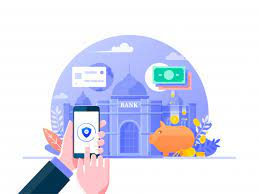

_I will be Creating a delinquency model which can predict in terms of a probability for each loan transaction,_

_whether the customer will be paying back the loaned amount within 5 days of insurance of loan (Label ‘1’ & ’0’)_



---

### _Importing Libraries_

In [2]:
import pandas as pd
import numpy as np

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

### _Reading the dataset_

In [3]:
df = pd.read_csv('sample_data_intw_Delinquency.csv')

In [6]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


---
## Data Preprocessing

In [14]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


### _Checking for null values_

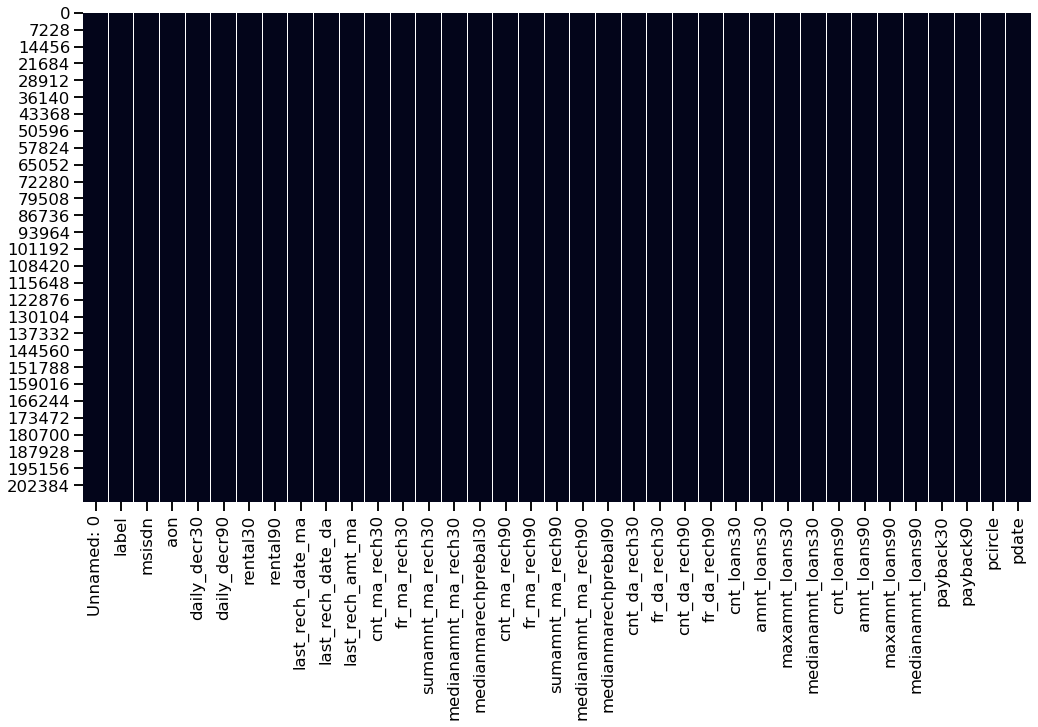

In [12]:
plt.figure(figsize=(17,9))
sns.heatmap(df.isnull(), cbar=False)
sns.set_context('talk')

In [11]:
# Just to be sure as this is a huge dataset
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

##### Now, Surely, No null values in this dataset.
---

In [4]:
# Dropping the first unnamed column :

df.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
df.tail()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [16]:
df.pcircle.unique()

array(['UPW'], dtype=object)

In [5]:
# Since, pcircle has only one value, dropping it also :
df.drop('pcircle',axis=1,inplace=True)

---

## Data Analysis

In [19]:
corrmat = df.corr()
top_corr_features = corrmat.index

In [30]:
df[top_corr_features].corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


##### Plotting top correlation festures using a heatmap

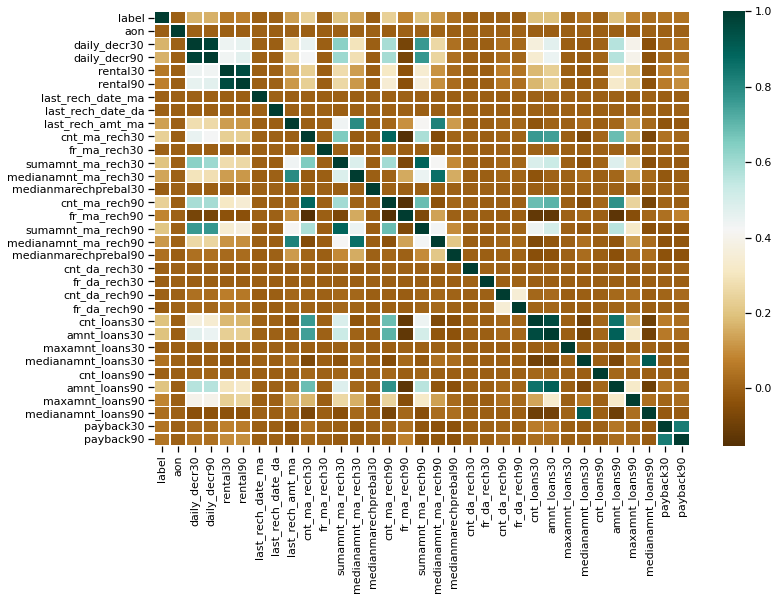

In [29]:
plt.figure(figsize=(12,8))
sns.set_context('notebook')

sns.heatmap(df[top_corr_features].corr(),cmap="BrBG", linewidths=.9)

---
### _Doing few Visualizations_

Text(0.5, 1.0, 'No. of loans taken by the user in the last 30 days')

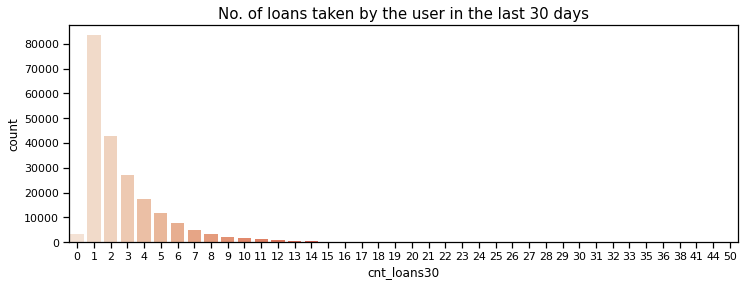

In [44]:
plt.figure(figsize=(12,4))
sns.countplot(x='cnt_loans30',data=df, palette='rocket_r')
sns.set_context('notebook')
plt.title("No. of loans taken by the user in the last 30 days", size =15)

Text(0.5, 1.0, 'Total Amount of loans taken by the user in the last 30 days')

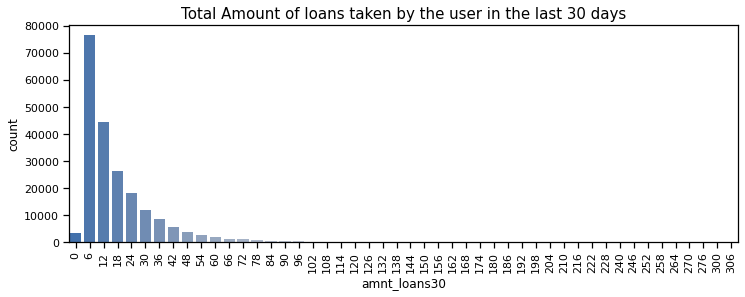

In [96]:
plt.figure(figsize=(12,4))
g=sns.countplot(x='amnt_loans30',data=df, palette='vlag')
sns.set_context('notebook')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Total Amount of loans taken by the user in the last 30 days", size =15)

Text(0.5, 1.0, 'Frequency of main account recharged in last 90 days')

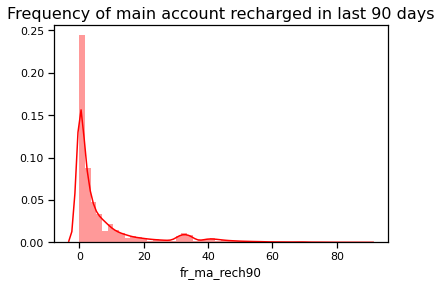

In [98]:
sns.distplot( df["fr_ma_rech90"] , color="red")
sns.set_context('notebook')
plt.title("Frequency of main account recharged in last 90 days", size =16)

Text(0.5, 1.0, 'Frequency of data account recharged in last 90 days')

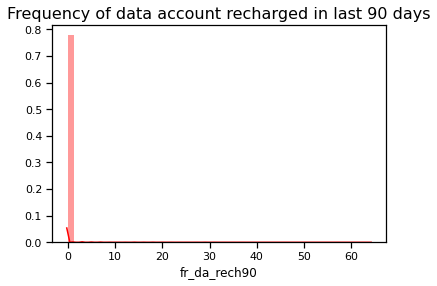

In [79]:
sns.distplot( df["fr_da_rech90"] , color="red")
sns.set_context('notebook')
plt.title("Frequency of data account recharged in last 90 days", size =16)

---

## For making the Model and Predicting :

In [99]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22


### _Independent and dependent features_

In [119]:
# X= df.drop(['label'],axis=1)

In [6]:
y=df['label']

In [7]:
df.drop('msisdn',axis=1,inplace=True)

_Now, Dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space._<br>
_Principal Component Analysis- PCA_

In [9]:
from sklearn.decomposition import PCA

In [10]:
dfn = df.copy()

In [11]:
dfn.drop('label', axis=1, inplace=True)

In [12]:
pca = PCA(n_components=15)
dfn_pca = pca.fit_transform(dfn)

In [13]:
X= dfn_pca

### _Train-Test Split_

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

---

## Using RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc= RandomForestClassifier(n_estimators=8)

In [18]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_rfc = accuracy_score(y_pred, y_test)

In [52]:
accuracy_rfc

0.8894525907312574

_Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data Using Cross Validation to check overfitting of the model_

In [26]:
from sklearn.model_selection import cross_val_score
rscore=cross_val_score(rfc,X,y,cv=8)

In [29]:
rscore

array([0.89034351, 0.88747662, 0.88888889, 0.89064468, 0.88835452,
       0.88885072, 0.88984312, 0.8918661 ])

In [30]:
rscore.mean()

0.8895335206328894

---

#### Using Support Vector Machine

In [143]:
from sklearn.svm import SVC

In [144]:
svm=SVC()

In [1]:
# svm.fit(X_train, y_train)

## running endlessly due to large dataset.

---

### _Confusion Matrix_

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
conf= confusion_matrix(y_test, y_pred)

In [33]:
conf

array([[ 3380,  4405],
       [ 2546, 52547]], dtype=int64)

##### Plotting the Confusion Matrix

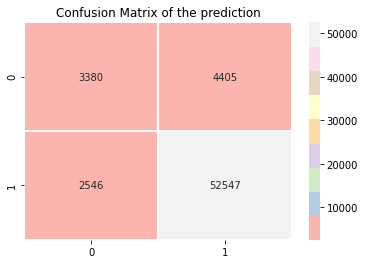

In [47]:
sns.heatmap(conf, annot=True, cmap="Pastel1", linewidths=.9, fmt='d')
plt.title('Confusion Matrix of the prediction')
plt.show()

### _The Classification Report_

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.43      0.49      7785
           1       0.92      0.95      0.94     55093

    accuracy                           0.89     62878
   macro avg       0.75      0.69      0.72     62878
weighted avg       0.88      0.89      0.88     62878



In [53]:
accuracy_rfc

0.8894525907312574

# _Conclusion :_

_I have done Analysis as well as visualization of the Dataset._ <br>
_And then,Trained the model using RandomForestClassifier_ <Br>
_At last, i can say that my designed model predicted well as by giving the accuracy of around 90%._